# INTRODUCTION
A beverage manufacturing company wants to segment its wholesale customers into distinct groups, so their marketing team would be able to create Personalized Customer Experience, Targeted Marketing Campaigns and Optimized Pricing Strategies. 

We will be using RMF Analysis and K-means Clustering to segment the customers.


RFM analysis is a customer segmentation technique used in marketing and analytics to classify customers based on their past behavior and interactions with a business. RFM stands for Recency, Frequency, and Monetary, which are three key metrics used to evaluate customer engagement and value. Here's what each component of RFM analysis represents:

Recency (R): This measures how recently a customer made a purchase or interacted with the business. Customers who have made a purchase more recently are likely to be more engaged and responsive.

Frequency (F): This measures how often a customer has made purchases or engaged with the business over a specific period. Higher frequency often indicates a more loyal and active customer.

Monetary (M): This measures the total amount of money a customer has spent on purchases. Customers who have spent more money are generally more valuable to the business.


K-means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into K (user-defined number of clusters) distinct, non-overlapping cluster. 



# About the Data
The dataset consists historical sales data of a beverage manufacturing company.  


#### Variables

- Age -                             int64
- Gender        -                  object
- Income       -                  float64
- Education       -                object
- Occupation                      object
- Marital_Status    -              object
- Family_Size   -                   int64
- Region    -                      object
- Purchase_Frequency    -           int64
- Amount_Spent       -              int64
- Brand_Loyalty          -         object
- Lifestyle_Preferences -          object
- Hobbies_Interests     -          object
- Values_Beliefs     -             object
- Social_Media_Behavior   -        object
- Customer_Satisfaction_Score  -    int64
- Product_Category        -        object
- Online_Shopping_Preference  -    object
- Usage_Frequency    -             object
- Zip_Code          -               int64
- Spending_Score      -             int64
- Customer_id     -                object
- Purchase_date     -              object


#### Data Source: Fictional data generated via faker 

In [127]:
#Importing the libraries

import pandas as pd
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch



In [108]:
data = pd.read_csv('/Users/bfree/Documents/customer_segmentation/wholesalers.csv')
data = data.drop(columns=['Customer_Segment'])
data.head()

,Customer_id,Age,Gender,Income,Education,Occupation,Marital_Status,Family_Size,Region,Purchase_Frequency,...,Values_Beliefs,Social_Media_Behavior,Customer_Satisfaction_Score,Product_Category,Online_Shopping_Preference,Usage_Frequency,Engagement_Level,Zip_Code,Spending_Score,Purchase_date
0,C-01,63,Female,892502.23,PhD,Theatre stage manager,Single,4,Agege,18,...,Freedom,Posting about hobbies and interests,1,Energy Drink,Online,Monthly,Medium,100283,2,21/07/2023 20:56
1,C-02,31,Female,991571.41,Master's,"Designer, graphic",Widowed,2,Kosofe,18,...,Open-mindedness,Sharing work-related achievements,3,Energy Drink,Offline,Monthly,High,100241,3,10/08/2023 10:50
2,C-03,27,Male,165689.10,Master's,Engineering geologist,Divorced,2,Ojo,13,...,Diversity,Sharing quotes and mantras,3,Fruit Juice,Online,Daily,Medium,102101,2,22/04/2023 09:42
3,C-04,29,Male,193115.41,Bachelor's,English as a second language teacher,Widowed,5,Epe,3,...,Freedom,Sharing DIY and home improvement projects,1,Fruit Juice,Offline,Weekly,Low,106101,3,16/12/2022 10:21
4,C-05,42,Female,349440.34,Bachelor's,Structural engineer,Single,4,Oshodi/Isolo,16,...,Compassion,Interacting with brands and businesses,3,Energy Drink,Offline,Weekly,High,100261,2,10/06/2023 14:53


# Exploratory Data Analysis

In [44]:
def check(df):
    print("Shape". center(82,'~'))
    print("Rows:{}".format(df.shape[0]))
    print("Columns:{}".format(df.shape[1]))
    print("Data Type". center(82,'~'))
    print(df.dtypes)
    print("Null Values". center(82,'~'))
    print(df.isnull().sum())
    print("Percentage Null Values". center(82,'~'))
    print((df.isnull().mean()*100).round(2))
    print("Duplicates". center(82,'~'))
    print(df.duplicated().sum())

check(data)



def check_variable(df):
    nunique_df = pd.DataFrame({'Variable':df.columns, 'Classes':[f'{df[i].nunique()} labels' for i in df.columns]})
    nunique_df = nunique_df.sort_values('Classes', ascending = False)
    nunique_df = nunique_df.reset_index(drop =True)
    return nunique_df
check_variable(data[['Gender','Marital_Status','Education','Product_Category','Online_Shopping_Preference','Usage_Frequency',]])

print("Marital_Status". center(82,'~'))
print(data['Marital_Status'].value_counts())
print("Education". center(82,'~'))
print(data['Education'].value_counts())
print("Product_Category". center(82,'~'))
print(data['Product_Category'].value_counts())
print("Usage_Frequency". center(82,'~'))
print(data['Usage_Frequency'].value_counts())
print("Online_Shopping_Preference". center(82,'~'))
print(data['Online_Shopping_Preference'].value_counts())
print("Spending_Score". center(82,'~'))
print(data['Spending_Score'].value_counts())
print("Gender". center(82,'~'))
print(data['Gender'].value_counts())
print("Engagement_Level". center(82,'~'))
print(data['Engagement_Level'].value_counts())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Shape~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows:3437
Columns:24
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Data Type~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Customer_id                     object
Age                              int64
Gender                          object
Income                         float64
Education                       object
Occupation                      object
Marital_Status                  object
Family_Size                      int64
Region                          object
Purchase_Frequency               int64
Amount_Spent                     int64
Brand_Loyalty                   object
Lifestyle_Preferences           object
Hobbies_Interests               object
Values_Beliefs                  object
Social_Media_Behavior           object
Customer_Satisfaction_Score      int64
Product_Category                object
Online_Shopping_Preference      object
Usage_Frequency                 object
Engagement_Level                o

In [109]:
data2 = data.drop(columns=['Zip_Code','Customer_id'])
data2.describe().T.round()

# Marital_Status

,count,mean,std,min,25%,50%,75%,max
Age,3437.0,44.0,16.0,18.0,31.0,44.0,58.0,70.0
Income,3437.0,514555.0,287147.0,20062.0,263502.0,512488.0,769798.0,999835.0
Family_Size,3437.0,4.0,2.0,1.0,2.0,3.0,5.0,6.0
Purchase_Frequency,3437.0,15.0,9.0,1.0,8.0,16.0,23.0,30.0
Amount_Spent,3437.0,1258290.0,432077.0,500580.0,896737.0,1249872.0,1627773.0,1999466.0
Customer_Satisfaction_Score,3437.0,3.0,1.0,1.0,2.0,3.0,4.0,5.0
Spending_Score,3437.0,2.0,1.0,1.0,2.0,2.0,3.0,3.0


In [27]:
data2.corr()

/var/folders/z7/vnb500ls4xl36_q1tpnl0_y80000gn/T/ipykernel_84617/1981098430.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()


,Age,Income,Family_Size,Purchase_Frequency,Amount_Spent,Customer_Satisfaction_Score,Spending_Score
Age,1.000000,0.022028,-0.002551,-0.011290,-0.026139,-0.001868,-0.019308
Income,0.022028,1.000000,0.000032,0.004152,-0.052675,0.012664,-0.055053
Family_Size,-0.002551,0.000032,1.000000,-0.023694,0.006787,0.005480,-0.007914
Purchase_Frequency,-0.011290,0.004152,-0.023694,1.000000,-0.005859,-0.005898,-0.009403
Amount_Spent,-0.026139,-0.052675,0.006787,-0.005859,1.000000,0.022152,0.921940
Customer_Satisfaction_Score,-0.001868,0.012664,0.005480,-0.005898,0.022152,1.000000,0.040412
Spending_Score,-0.019308,-0.055053,-0.007914,-0.009403,0.921940,0.040412,1.000000


There is a strong positive correlation (0.921940) between spending_score and amount_spent.

### Taking a look at the data distributions to spot outliers

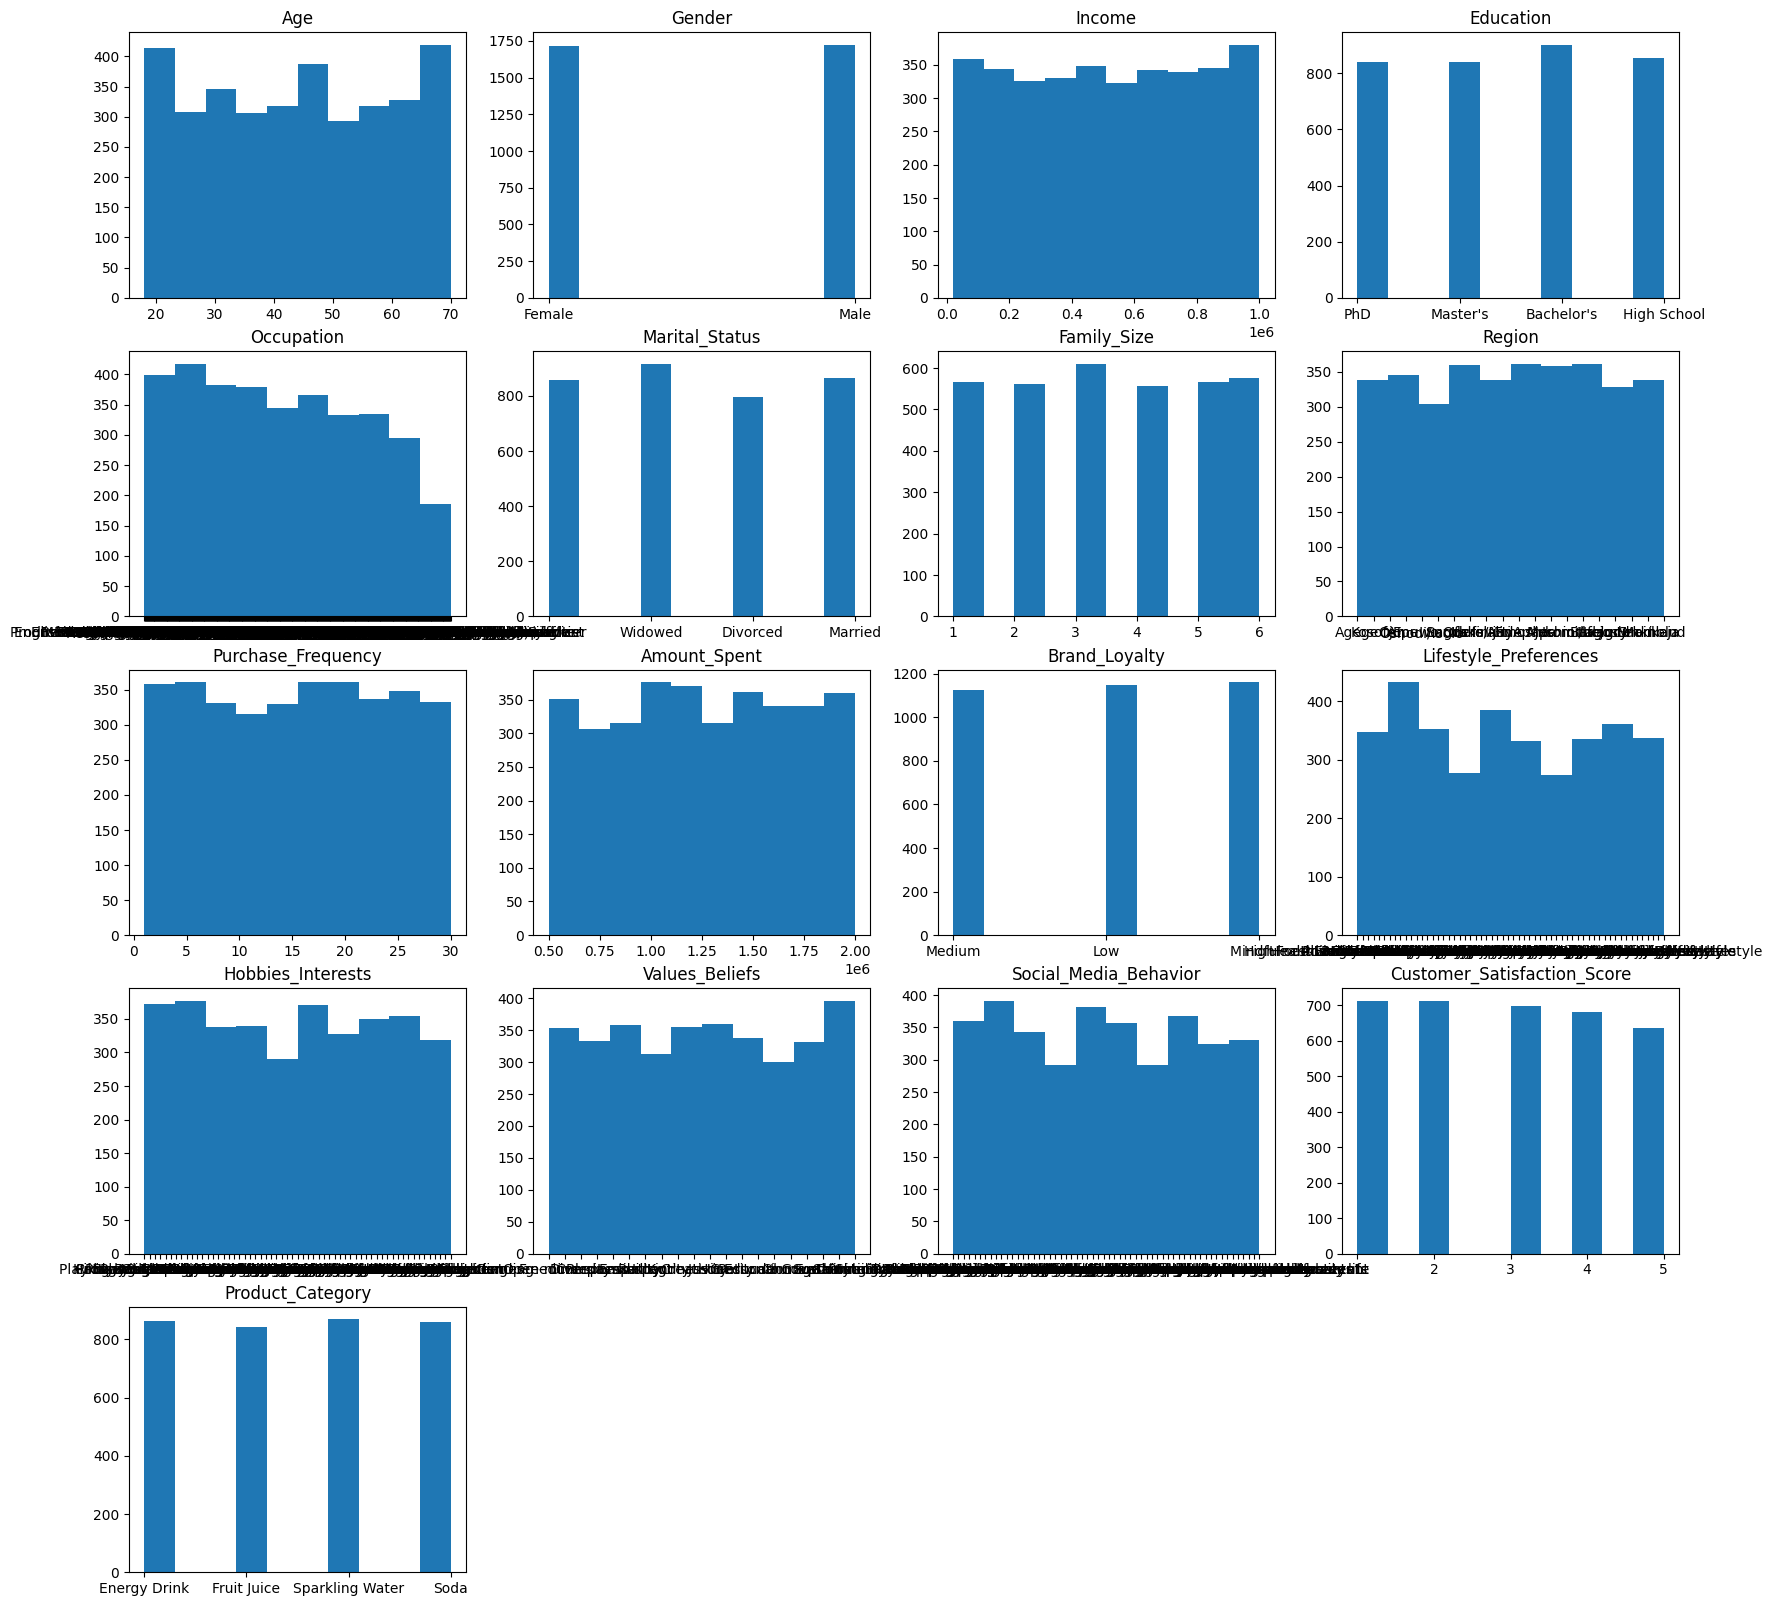

In [28]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize = (20,20))

z = 0
for i in range(5):
    for j in range(4):
        if z > 16:
            axs[i][j].axis(False)
        else:
            axs[i][j].set_title(data2.iloc[:,z].name)
            axs[i][j].hist(data2.iloc[:,z])
        z+=1

There are no outliers 

# Data Pre-processing

In [140]:
data['Purchase_date'] = pd.to_datetime(data['Purchase_date'])

In [196]:
data_pp = data.copy()



# Mapping the categorical string variables
data_pp['Marital_Status'] = data_pp['Marital_Status'].map({'Widowed': 1, 'Married': 2, 'Single': 3,'Divorced':4 })
data_pp['Education'] = data_pp['Education'].map({"Bachelor's": 1, "High School": 2, "Master's": 3,"PhD":4 })
data_pp['Product_Category'] = data_pp['Product_Category'].map( {'Sparkling Water': 1, 'Energy Drink': 2, 'Soda': 3,'Fruit Juice':4 })
data_pp['Usage_Frequency'] = data_pp['Usage_Frequency'].map({'Weekly': 1, 'Daily': 2, 'Monthly': 3})
data_pp['Online_Shopping_Preference'] = data_pp['Online_Shopping_Preference'].map({'Offline': 1, 'Online': 2})
data_pp['Gender'] = data_pp['Gender'].map({'Male': 1, 'Female': 2})
data_pp['Engagement_Level'] = data_pp['Engagement_Level'].map({'High': 1, 'Low': 2, 'Medium':3})


data_pp.head()

,Customer_id,Age,Gender,Income,Education,Occupation,Marital_Status,Family_Size,Region,Purchase_Frequency,...,Values_Beliefs,Social_Media_Behavior,Customer_Satisfaction_Score,Product_Category,Online_Shopping_Preference,Usage_Frequency,Engagement_Level,Zip_Code,Spending_Score,Purchase_date
0,C-01,63,2,892502.23,4,Theatre stage manager,3,4,Agege,18,...,Freedom,Posting about hobbies and interests,1,2,2,3,3,100283,2,2023-07-21 20:56:00
1,C-02,31,2,991571.41,3,"Designer, graphic",1,2,Kosofe,18,...,Open-mindedness,Sharing work-related achievements,3,2,1,3,1,100241,3,2023-10-08 10:50:00
2,C-03,27,1,165689.10,3,Engineering geologist,4,2,Ojo,13,...,Diversity,Sharing quotes and mantras,3,4,2,2,3,102101,2,2023-04-22 09:42:00
3,C-04,29,1,193115.41,1,English as a second language teacher,1,5,Epe,3,...,Freedom,Sharing DIY and home improvement projects,1,4,1,1,2,106101,3,2022-12-16 10:21:00
4,C-05,42,2,349440.34,1,Structural engineer,3,4,Oshodi/Isolo,16,...,Compassion,Interacting with brands and businesses,3,2,1,1,1,100261,2,2023-10-06 14:53:00


In [208]:
# Check for missing values
data_pp.isnull().sum()

Customer_id                    0
Age                            0
Gender                         0
Income                         0
Education                      0
Occupation                     0
Marital_Status                 0
Family_Size                    0
Region                         0
Purchase_Frequency             0
Amount_Spent                   0
Brand_Loyalty                  0
Lifestyle_Preferences          0
Hobbies_Interests              0
Values_Beliefs                 0
Social_Media_Behavior          0
Customer_Satisfaction_Score    0
Product_Category               0
Online_Shopping_Preference     0
Usage_Frequency                0
Engagement_Level               0
Zip_Code                       0
Spending_Score                 0
Purchase_date                  0
Recency                        0
R_rank_norm                    0
F_rank_norm                    0
M_rank_norm                    0
rfm_score                      0
Customer_segment               0
dtype: int

### Scaling the data

In [50]:
data_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3437 entries, 0 to 3436
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_id                  3437 non-null   object 
 1   Age                          3437 non-null   int64  
 2   Gender                       3437 non-null   int64  
 3   Income                       3437 non-null   float64
 4   Education                    3437 non-null   int64  
 5   Occupation                   3437 non-null   object 
 6   Marital_Status               3437 non-null   int64  
 7   Family_Size                  3437 non-null   int64  
 8   Region                       3437 non-null   object 
 9   Purchase_Frequency           3437 non-null   int64  
 10  Amount_Spent                 3437 non-null   int64  
 11  Brand_Loyalty                3437 non-null   object 
 12  Lifestyle_Preferences        3437 non-null   object 
 13  Hobbies_Interests 

In [58]:
robustScaler_data = RobustScaler().fit_transform(X)

In [142]:
# Choosing a scaler

X = data_pp[['Age','Gender','Income','Education','Marital_Status','Family_Size','Purchase_Frequency',
             'Amount_Spent','Customer_Satisfaction_Score','Product_Category','Online_Shopping_Preference',
             'Usage_Frequency','Engagement_Level','Spending_Score']]

minMaxScaler = MinMaxScaler().fit_transform(X)
standardScaler = StandardScaler().fit_transform(X)
robustScaler = RobustScaler().fit_transform(X)
maxAbsScaler = MaxAbsScaler().fit_transform(X)



def pca_and_standardize(data, n_components=13, scalers=None):
    if scalers is None:
        scalers = ['standard', 'minmax', 'robust', 'maxabs']

    results = {}
    
    for scaler in scalers:
        if scaler == 'standard':
            data_scaled = StandardScaler().fit_transform(data)
        elif scaler == 'minmax':
            data_scaled = MinMaxScaler().fit_transform(data)
        elif scaler == 'robust':
            data_scaled = RobustScaler().fit_transform(data)
        elif scaler == 'maxabs':
            data_scaled = MaxAbsScaler().fit_transform(data)
        else:
            raise ValueError("Invalid scaler type. Use 'standard', 'minmax', 'robust', or 'maxabs'.")

     
        pca = PCA(n_components=n_components)
        pca.fit(data_scaled)
        pca_data = pca.transform(data_scaled)

        per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
        labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

        
        print(f'{scaler}Scaler has {round(np.sum(per_var[:3]),2)}% variance score') # Variance that lies on the first 3 principal components


        results[scaler] = pca_data

    return results

scalers_to_use = ['standard', 'minmax', 'robust', 'maxabs']
results = pca_and_standardize(X, n_components=13, scalers=scalers_to_use)

standardScaler has 29.2% variance score
minmaxScaler has 36.0% variance score
robustScaler has 37.5% variance score
maxabsScaler has 27.4% variance score


# SEGMENTATION (Using RMF Score)


### Calulate the Recency

In [202]:
current_date

datetime.datetime(2023, 11, 23, 10, 24, 1, 833147)

In [214]:

data_pp['Purchase_date'] = pd.to_datetime(data_pp['Purchase_date'])

# Calculate recency in days
current_date = dt.datetime(2024, 1, 1)

data_pp['Recency'] = (current_date - data_pp['Purchase_date']).dt.days

data_pp.head()

,Customer_id,Age,Gender,Income,Education,Occupation,Marital_Status,Family_Size,Region,Purchase_Frequency,...,Engagement_Level,Zip_Code,Spending_Score,Purchase_date,Recency,R_rank_norm,F_rank_norm,M_rank_norm,rfm_score,Customer_segment
0,C-01,63,2,892502.23,4,Theatre stage manager,3,4,Agege,18,...,3,100283,2,2023-07-21 20:56:00,163,83.796768,59.069424,49.985452,2.88,Low Value Customers
1,C-02,31,2,991571.41,3,"Designer, graphic",1,2,Kosofe,18,...,1,100241,3,2023-10-08 10:50:00,84,96.200320,59.069424,98.108816,4.34,High value Customers
2,C-03,27,1,165689.10,3,Engineering geologist,4,2,Ojo,13,...,3,102101,2,2023-04-22 09:42:00,253,60.416363,42.023634,46.421298,2.36,Low Value Customers
3,C-04,29,1,193115.41,1,English as a second language teacher,1,5,Epe,3,...,2,106101,3,2022-12-16 10:21:00,380,29.989809,8.670606,99.185336,3.17,Medium Value Customers
4,C-05,42,2,349440.34,1,Structural engineer,3,4,Oshodi/Isolo,16,...,1,100261,2,2023-10-06 14:53:00,86,95.574319,51.935007,39.773058,2.58,Low Value Customers


### Function to calculate RMF Score using normalized ranking


In [216]:
# Function to calculate RMF Score using normalized ranking

def rfm_seg(df):  
 
    df['R_rank'] = df['Recency'].rank(ascending=False) #The higher the Recency the lower the rank i.e ascending=False



    df['F_rank'] = df['Purchase_Frequency'].rank(ascending=True) #The higher the Purchase_Frequency the higher the rank i.e ascending=True


    df['M_rank'] = df['Amount_Spent'].rank(ascending=True) #The higher the Amount_Spent the higher the rank i.e ascending=True


    # normalizing the rank of the customers
    df['R_rank_norm'] = (df['R_rank']/df['R_rank'].max())*100
    df['F_rank_norm'] = (df['F_rank']/df['F_rank'].max())*100
    df['M_rank_norm'] = (df['M_rank']/df['M_rank'].max())*100

    df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
    
    df['rfm_score'] = 0.15*df['R_rank_norm'] + 0.28*df['F_rank_norm'] + 0.57*df['M_rank_norm']


    #scale down the values
    df['rfm_score'] *= 0.05 

    df = df.round(2)

    
#     Scale: 1 - 5

#     rfm score >4.5 : Top Customers
#     4.5 > rfm score > 4 : High Value Customers
#     4>rfm score >3 : Medium value customers
#     3>rfm score>1.6 : Low-value customers
#     rfm score<1.6 :Lost Customers

    df["Customer_segment"] = np.where(df['rfm_score'] >
                                4.5, "Top Customers",
                                (np.where(
                                df['rfm_score'] > 4,
                                "High value Customers",
                                (np.where(
                                df['rfm_score'] > 3,
                                "Medium Value Customers",
                                np.where(df['rfm_score'] > 1.6,
                                'Low Value Customers', 'Lost Customers'))))))

    seg_data = df[[ 'rfm_score','Customer_segment']]
    return seg_data
    
    
rfm_data = rfm_seg(data_pp)


data_pp[[ 'rfm_score','Customer_segment']] = rfm_data

In [217]:
data_pp.head()

,Customer_id,Age,Gender,Income,Education,Occupation,Marital_Status,Family_Size,Region,Purchase_Frequency,...,Engagement_Level,Zip_Code,Spending_Score,Purchase_date,Recency,R_rank_norm,F_rank_norm,M_rank_norm,rfm_score,Customer_segment
0,C-01,63,2,892502.23,4,Theatre stage manager,3,4,Agege,18,...,3,100283,2,2023-07-21 20:56:00,163,83.690112,59.069424,49.985452,2.88,Low Value Customers
1,C-02,31,2,991571.41,3,"Designer, graphic",1,2,Kosofe,18,...,1,100241,3,2023-10-08 10:50:00,84,96.126402,59.069424,98.108816,4.34,High value Customers
2,C-03,27,1,165689.10,3,Engineering geologist,4,2,Ojo,13,...,3,102101,2,2023-04-22 09:42:00,253,60.637833,42.023634,46.421298,2.37,Low Value Customers
3,C-04,29,1,193115.41,1,English as a second language teacher,1,5,Epe,3,...,2,106101,3,2022-12-16 10:21:00,380,30.129605,8.670606,99.185336,3.17,Medium Value Customers
4,C-05,42,2,349440.34,1,Structural engineer,3,4,Oshodi/Isolo,16,...,1,100261,2,2023-10-06 14:53:00,86,95.471094,51.935007,39.773058,2.58,Low Value Customers


### Evaluation 

The calculated RFM Score for each customer is used to group the customers into distinct groups with the aid of an instrument. 

Scale: 1 - 5

- rfm score >4.5      : Top Customers 
- 4.5 > rfm score > 4 : High Value Customers 
- 4>rfm score >3      : Medium value customers 
- 3>rfm score>1.6     : Low-value customers 
- rfm score<1.6       : Lost Customers 


The customers are valued on the basis of recency (how recent was their last purchase), frequency (how many purchases have they made) and monetary value (how much they have spent).

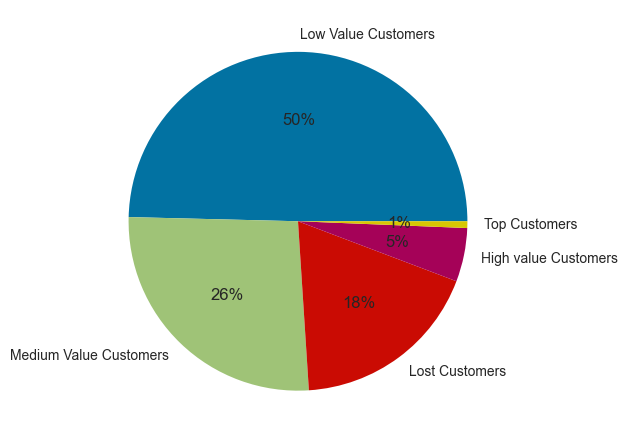

In [218]:
plt.pie(data_pp.Customer_segment.value_counts(),
        labels=data_pp.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [220]:
data_pp[["Customer_segment","Recency","Purchase_Frequency","Amount_Spent"]].groupby("Customer_segment").agg(["median","count","max","min"])

Recency                Purchase_Frequency            \
                        median count  max min             median count max   
Customer_segment                                                             
High value Customers     218.5   176  690  23               25.0   176  30   
Lost Customers           352.0   626  721  24                8.0   626  29   
Low Value Customers      298.0  1705  721  23               15.0  1705  30   
Medium Value Customers   275.5   908  721  23               19.0   908  30   
Top Customers            179.0    22  315  57               28.0    22  30   

                           Amount_Spent                          
                       min       median count      max      min  
Customer_segment                                                 
High value Customers    13    1879664.0   176  1997040  1549505  
Lost Customers           1     693765.0   626  1235936   501030  
Low Value Customers      1    1153231.0  1705  1992032   500580  
Medium Value Customers   1    1690171.5   908  1999466  1020519  
Top Customers           24    1947940.0    22  1997931  1831724

- Top Customers (1%) have an average purchase history of 179 days, have made 28 purchases, and have spent an average of N1,947,940.
- High Value Customers (5%) have an average purchase history of 219 days, have made 25 purchases, and have spent an average of N1,879,664.
- Medium value customers (26%) have an average purchase history of 298 days, have made 19 purchases, and have spent an average of N1,690,171.5.
- Low-value customers (50%) have an average purchase history of 276 days, have made 15 purchases, and have spent an average of N1,153,231.0.
- Lost Customers (18%) have an average purchase history of 352 days, have made 8 purchases, and have spent an average of N693,765.0


### Recommendation

Creating personalized customer experiences, targeted marketing campaigns, and optimized pricing strategies 
for each customer segment is essential for maximizing customer satisfaction and profitability. 


1. Top Customers (1%):
* Personalized Customer Experience:
Provide exclusive previews, early access, or limited products. Offer premium customer service, dedicated account managers, and personalized communication.

* Targeted Marketing Campaigns:
Create bespoke loyalty programs with high-value rewards. Share exclusive content, such as insider updates, tailored to their interests.

* Optimized Pricing Strategies:
Offer tiered discounts based on their lifetime value and purchase history. Provide special bundles or packages at discounted rates.


2. High-Value Customers (5%):
* Personalized Customer Experience:
Use data analytics to suggest products based on their previous purchases. Ensure faster response times and priority access to support channels.

* Targeted Marketing Campaigns:
Recommend complementary products or upgrades. Offer exclusive previews or early access to new products.

* Optimized Pricing Strategies:
Provide discounts for bulk purchases.

3. Medium-Value Customers (26%):
* Personalized Customer Experience:
Tailor email campaigns and promotions based on their preferences. Encourage feedback and use it to enhance their experience.

* Targeted Marketing Campaigns:
Offer promotions and discounts aligned with their historical purchase patterns. Encourage them to refer friends with incentives.

* Optimized Pricing Strategies:
Create tiered pricing plans with added benefits for higher tiers. Implement time-sensitive discounts to drive immediate purchases.

4. Low-Value Customers (50%):
* Personalized Customer Experience: 
Provide resources to help them get the most out of their purchase. Keep them informed about new products that may interest them.

* Targeted Marketing Campaigns:
Highlight special offers. Share content that educates them on product benefits.

* Optimized Pricing Strategies:
Encourage them to purchase more through bundled discounts. Introduce entry-level pricing options to attract cost-conscious customers.

5. Lost Customers (18%):
* Personalized Customer Experience:
Use targeted emails and promotions to bring them back. Understand the reasons for their departure and address concerns.

* Targeted Marketing Campaigns:
Offer special promotions or incentives to encourage them to return. Highlight any improvements since their last purchase.

* Optimized Pricing Strategies:
Provide discounts or special offers for their next purchase. Create urgency with time-sensitive offers to entice them to come back.

# SEGMENTATION (Using K-Means Model)

In [148]:

X = data_pp[['Age','Gender','Income','Education','Marital_Status','Family_Size','Purchase_Frequency',
             'Amount_Spent','Customer_Satisfaction_Score','Product_Category','Online_Shopping_Preference',
             'Usage_Frequency','Engagement_Level','Spending_Score','rfm_score']]

## Determine number of clusters

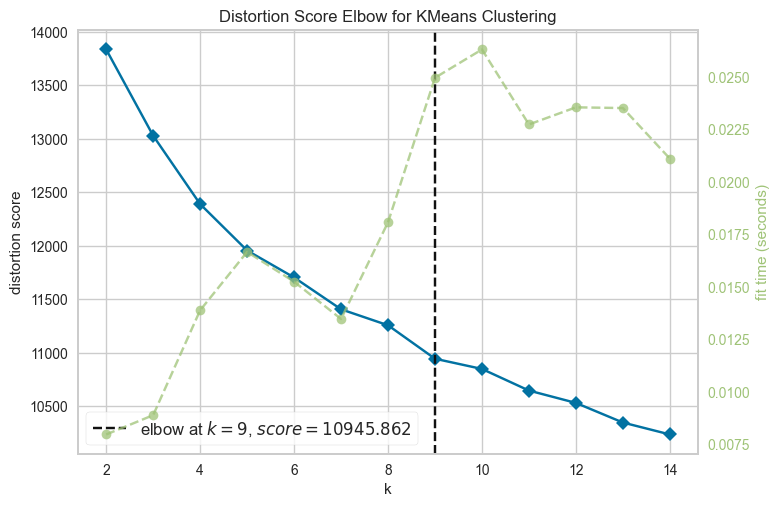

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [149]:

robustScaler_data = RobustScaler().fit_transform(X)


X = robustScaler_data


k_range = range(2, 15)


k_error = []
silh = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", max_iter=500, random_state=42, n_init="auto")
    kmeans.fit(X)
    labels = kmeans.labels_
    # score = silhouette_score(X, labels)
    silh.append(silhouette_score(X, labels))
    k_error.append(kmeans.inertia_)

    # print(f"For k={k}, silhouette score: {score}")
    

kmeans = KMeans(init="k-means++", max_iter=500, random_state=42, n_init="auto",)
e_view = KElbowVisualizer(kmeans, k=k_range)
e_view.fit(X)
e_view.show()

In [151]:
kmeans = KMeans(n_clusters=e_view.elbow_value_ , init='k-means++') 
y_kmeans = kmeans.fit_predict(X) 


clusters_2 = pd.DataFrame(y_kmeans,columns=['Kmeans_Segments'])
reset_df_2 = data_pp.reset_index()
Kmeans_Segments = reset_df_2.merge(clusters_2, left_index=True, right_index=True)
Kmeans_Segments.head()

/Users/bfree/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,index,Customer_id,Age,Gender,Income,Education,Occupation,Marital_Status,Family_Size,Region,...,Zip_Code,Spending_Score,Purchase_date,Recency,R_rank_norm,F_rank_norm,M_rank_norm,rfm_score,Customer_segment,Kmeans_Segments
0,0,C-01,63,2,892502.23,4,Theatre stage manager,3,4,Agege,...,100283,2,2023-07-21 20:56:00,100,83.690112,59.069424,49.985452,2.88,Low Value Customers,0
1,1,C-02,31,2,991571.41,3,"Designer, graphic",1,2,Kosofe,...,100241,3,2023-10-08 10:50:00,21,96.126402,59.069424,98.108816,4.34,High value Customer,2
2,2,C-03,27,1,165689.10,3,Engineering geologist,4,2,Ojo,...,102101,2,2023-04-22 09:42:00,190,60.637833,42.023634,46.421298,2.37,Low Value Customers,6
3,3,C-04,29,1,193115.41,1,English as a second language teacher,1,5,Epe,...,106101,3,2022-12-16 10:21:00,317,30.129605,8.670606,99.185336,3.17,Medium Value Customer,4
4,4,C-05,42,2,349440.34,1,Structural engineer,3,4,Oshodi/Isolo,...,100261,2,2023-10-06 14:53:00,23,95.471094,51.935007,39.773058,2.58,Low Value Customers,0


## Analysing the Clusters

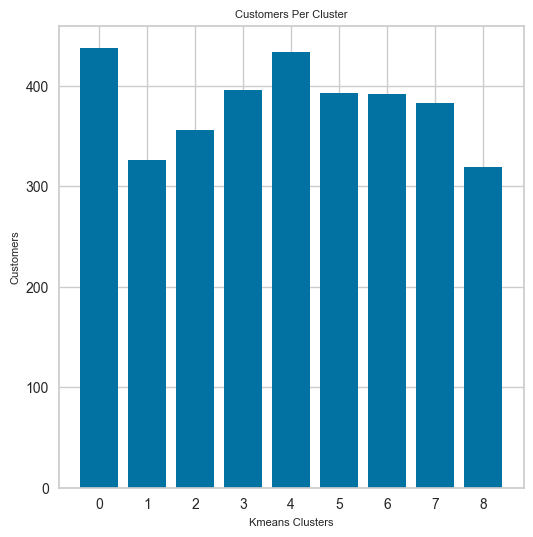

Kmeans Cluster 0: 438
Kmeans Cluster 1: 326
Kmeans Cluster 2: 356
Kmeans Cluster 3: 396
Kmeans Cluster 4: 434
Kmeans Cluster 5: 393
Kmeans Cluster 6: 392
Kmeans Cluster 7: 383
Kmeans Cluster 8: 319


In [286]:
labels, counts = np.unique(Kmeans_Segments['Kmeans_Segments'], return_counts = True)

plt.figure(figsize = (6, 6))
plt.title('Customers Per Cluster', size = 8)
plt.bar(labels, counts)
plt.xlabel('Kmeans Clusters', size = 8)
plt.ylabel('Customers', size = 8)
plt.xticks(labels)
plt.show()

for i in zip(labels, counts):
    print('Kmeans Cluster %s: %s' %(i[0],i[1]))
    
 

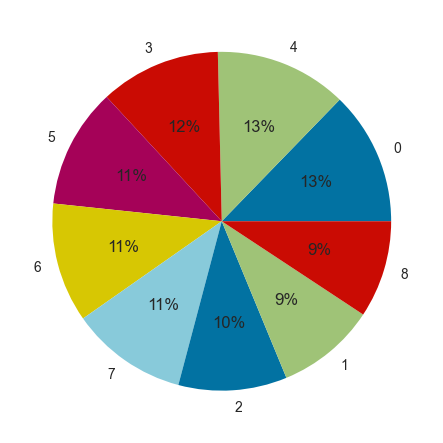

In [287]:
plt.pie(Kmeans_Segments.Kmeans_Segments.value_counts(),
        labels=Kmeans_Segments.Kmeans_Segments.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [299]:
Kmeans_Segs = Kmeans_Segments[['Age','Gender','Income','Education','Marital_Status','Family_Size','Purchase_Frequency',
             'Amount_Spent','Customer_Satisfaction_Score','Product_Category','Online_Shopping_Preference',
             'Usage_Frequency','Engagement_Level','Spending_Score','Kmeans_Segments']]


In [267]:
for i in range(e_view.elbow_value_):
    print('Cluster:', i)
    display(Kmeans_Segs[Kmeans_Segs['Kmeans_Segments'] == i].describe())
    print('\n')

Cluster: 0


,Age,Gender,Income,Education,Marital_Status,Family_Size,Purchase_Frequency,Amount_Spent,Customer_Satisfaction_Score,Product_Category,Online_Shopping_Preference,Usage_Frequency,Engagement_Level,Spending_Score,Kmeans_Segments
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,4.380000e+02,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0
mean,43.863014,1.447489,597639.065434,2.388128,2.493151,3.666667,22.527397,1.174827e+06,1.812785,2.422374,1.424658,1.881279,2.006849,1.984018,0.0
std,16.078453,0.497803,269673.384676,1.105446,1.079749,1.719010,4.764277,2.032561e+05,0.723341,1.148933,0.494856,0.808743,0.827142,0.125548,0.0
min,18.000000,1.000000,23724.240000,1.000000,1.000000,1.000000,9.000000,5.836320e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,30.000000,1.000000,388920.267500,1.000000,2.000000,2.000000,19.000000,1.015106e+06,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.0
50%,43.000000,1.000000,640505.060000,2.000000,2.000000,4.000000,23.000000,1.197186e+06,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.0
75%,59.000000,2.000000,830151.007500,3.000000,3.000000,5.000000,26.000000,1.346485e+06,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,0.0
max,70.000000,2.000000,998036.570000,4.000000,4.000000,6.000000,30.000000,1.499558e+06,3.000000,4.000000,2.000000,3.000000,3.000000,2.000000,0.0




Cluster: 1


,Age,Gender,Income,Education,Marital_Status,Family_Size,Purchase_Frequency,Amount_Spent,Customer_Satisfaction_Score,Product_Category,Online_Shopping_Preference,Usage_Frequency,Engagement_Level,Spending_Score,Kmeans_Segments
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.00000,326.000000,326.000000,326.0,326.0
mean,44.395706,1.487730,536854.253558,2.331288,2.484663,3.779141,16.696319,651887.582822,4.049080,2.579755,1.46319,1.944785,2.015337,1.0,1.0
std,15.093346,0.500618,289709.618370,1.134387,1.173323,1.671571,8.524162,88895.609871,0.775023,1.122396,0.49941,0.798086,0.786273,0.0,0.0
min,18.000000,1.000000,20061.580000,1.000000,1.000000,1.000000,1.000000,500580.000000,3.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.0
25%,31.000000,1.000000,263505.665000,1.000000,1.000000,2.000000,9.250000,569919.250000,3.000000,2.000000,1.00000,1.000000,1.000000,1.0,1.0
50%,45.000000,1.000000,563038.095000,2.000000,2.000000,4.000000,17.000000,649868.000000,4.000000,3.000000,1.00000,2.000000,2.000000,1.0,1.0
75%,57.750000,2.000000,793198.855000,3.000000,4.000000,5.000000,24.000000,728379.750000,5.000000,4.000000,2.00000,3.000000,3.000000,1.0,1.0
max,70.000000,2.000000,994943.600000,4.000000,4.000000,6.000000,30.000000,798493.000000,5.000000,4.000000,2.00000,3.000000,3.000000,1.0,1.0




Cluster: 2


,Age,Gender,Income,Education,Marital_Status,Family_Size,Purchase_Frequency,Amount_Spent,Customer_Satisfaction_Score,Product_Category,Online_Shopping_Preference,Usage_Frequency,Engagement_Level,Spending_Score,Kmeans_Segments
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,3.560000e+02,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.0
mean,45.132022,1.500000,530608.103652,2.530899,2.581461,3.247191,22.733146,1.758623e+06,3.952247,2.398876,1.497191,1.966292,2.028090,2.997191,2.0
std,15.554610,0.500704,297750.389765,1.106524,1.101392,1.665091,4.432800,1.495595e+05,0.836135,1.117542,0.500696,0.814647,0.835344,0.053000,0.0
min,18.000000,1.000000,29820.460000,1.000000,1.000000,1.000000,11.000000,1.439112e+06,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.0
25%,32.000000,1.000000,250271.970000,2.000000,2.000000,2.000000,19.000000,1.621943e+06,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.0
50%,46.000000,1.500000,543033.970000,2.500000,3.000000,3.000000,23.000000,1.755590e+06,4.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.0
75%,58.000000,2.000000,784945.762500,4.000000,4.000000,4.250000,26.000000,1.892701e+06,5.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.0
max,70.000000,2.000000,998078.950000,4.000000,4.000000,6.000000,30.000000,1.997931e+06,5.000000,4.000000,2.000000,3.000000,3.000000,3.000000,2.0




Cluster: 3


,Age,Gender,Income,Education,Marital_Status,Family_Size,Purchase_Frequency,Amount_Spent,Customer_Satisfaction_Score,Product_Category,Online_Shopping_Preference,Usage_Frequency,Engagement_Level,Spending_Score,Kmeans_Segments
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,3.960000e+02,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.0
mean,44.308081,1.540404,428266.255303,2.361111,2.335859,3.300505,7.563131,1.152989e+06,1.732323,2.441919,1.550505,2.088384,2.111111,2.012626,3.0
std,15.729390,0.498995,271690.227311,1.099322,1.118691,1.674258,4.612427,1.982420e+05,0.735409,1.140358,0.498072,0.817385,0.800492,0.111796,0.0
min,18.000000,1.000000,20242.340000,1.000000,1.000000,1.000000,1.000000,8.005080e+05,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.0
25%,29.750000,1.000000,192839.340000,1.000000,1.000000,2.000000,4.000000,9.867052e+05,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.0
50%,45.000000,2.000000,397008.205000,2.000000,2.000000,3.000000,7.000000,1.154922e+06,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.0
75%,58.000000,2.000000,632600.045000,3.000000,3.000000,5.000000,11.000000,1.315290e+06,2.000000,3.250000,2.000000,3.000000,3.000000,2.000000,3.0
max,70.000000,2.000000,995635.430000,4.000000,4.000000,6.000000,20.000000,1.616556e+06,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,3.0




Cluster: 4


,Age,Gender,Income,Education,Marital_Status,Family_Size,Purchase_Frequency,Amount_Spent,Customer_Satisfaction_Score,Product_Category,Online_Shopping_Preference,Usage_Frequency,Engagement_Level,Spending_Score,Kmeans_Segments
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,4.340000e+02,434.000000,434.000000,434.000000,434.000000,434.000000,434.0,434.0
mean,44.299539,1.511521,472443.691382,2.493088,2.605991,3.582949,16.748848,1.753562e+06,1.518433,2.532258,1.500000,1.972350,1.928571,3.0,4.0
std,15.434961,0.500444,286230.020500,1.145812,1.093361,1.697379,7.892117,1.476412e+05,0.557031,1.110571,0.500577,0.829129,0.819488,0.0,0.0
min,18.000000,1.000000,21319.290000,1.000000,1.000000,1.000000,1.000000,1.501550e+06,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,4.0
25%,30.250000,1.000000,234701.050000,1.000000,2.000000,2.000000,11.000000,1.628892e+06,1.000000,2.000000,1.000000,1.000000,1.000000,3.0,4.0
50%,44.000000,2.000000,442986.325000,2.000000,3.000000,4.000000,17.000000,1.756600e+06,1.000000,3.000000,1.500000,2.000000,2.000000,3.0,4.0
75%,58.000000,2.000000,725846.175000,4.000000,4.000000,5.000000,23.000000,1.892102e+06,2.000000,4.000000,2.000000,3.000000,3.000000,3.0,4.0
max,70.000000,2.000000,994632.480000,4.000000,4.000000,6.000000,30.000000,1.999466e+06,3.000000,4.000000,2.000000,3.000000,3.000000,3.0,4.0




Cluster: 5


,Age,Gender,Income,Education,Marital_Status,Family_Size,Purchase_Frequency,Amount_Spent,Customer_Satisfaction_Score,Product_Category,Online_Shopping_Preference,Usage_Frequency,Engagement_Level,Spending_Score,Kmeans_Segments
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,3.930000e+02,393.000000,393.000000,393.000000,393.000000,393.000000,393.0,393.0
mean,46.432570,1.399491,577172.849262,2.246819,2.590331,3.704835,8.949109,1.099609e+06,4.124682,2.371501,1.414758,1.994911,1.949109,2.0,5.0
std,15.049956,0.490418,269758.737235,1.079799,1.110069,1.655049,5.219905,1.991486e+05,0.754055,1.097028,0.493308,0.804943,0.809671,0.0,0.0
min,18.000000,1.000000,21107.670000,1.000000,1.000000,1.000000,1.000000,8.002600e+05,3.000000,1.000000,1.000000,1.000000,1.000000,2.0,5.0
25%,34.000000,1.000000,359204.220000,1.000000,2.000000,2.000000,5.000000,9.373420e+05,4.000000,1.000000,1.000000,1.000000,1.000000,2.0,5.0
50%,48.000000,1.000000,614316.240000,2.000000,3.000000,4.000000,8.000000,1.062605e+06,4.000000,2.000000,1.000000,2.000000,2.000000,2.0,5.0
75%,60.000000,2.000000,801130.190000,3.000000,4.000000,5.000000,13.000000,1.257542e+06,5.000000,3.000000,2.000000,3.000000,3.000000,2.0,5.0
max,70.000000,2.000000,995283.910000,4.000000,4.000000,6.000000,24.000000,1.498460e+06,5.000000,4.000000,2.000000,3.000000,3.000000,2.0,5.0




Cluster: 6


,Age,Gender,Income,Education,Marital_Status,Family_Size,Purchase_Frequency,Amount_Spent,Customer_Satisfaction_Score,Product_Category,Online_Shopping_Preference,Usage_Frequency,Engagement_Level,Spending_Score,Kmeans_Segments
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,3.920000e+02,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.0
mean,42.772959,1.579082,456830.947041,2.790816,2.308673,3.107143,22.346939,1.157752e+06,4.178571,2.688776,1.594388,1.931122,1.982143,1.992347,6.0
std,14.536909,0.494337,283415.418803,1.099694,1.119063,1.699631,5.437583,1.981128e+05,0.756050,1.108016,0.491638,0.826573,0.819948,0.087258,0.0
min,18.000000,1.000000,22544.040000,1.000000,1.000000,1.000000,4.000000,7.433820e+05,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.0
25%,31.000000,1.000000,207242.485000,2.000000,1.000000,2.000000,18.750000,9.906462e+05,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000,6.0
50%,42.500000,2.000000,422524.340000,3.000000,2.000000,3.000000,23.000000,1.148198e+06,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,6.0
75%,54.250000,2.000000,699050.342500,4.000000,3.000000,4.250000,27.000000,1.334821e+06,5.000000,4.000000,2.000000,3.000000,3.000000,2.000000,6.0
max,70.000000,2.000000,997533.470000,4.000000,4.000000,6.000000,30.000000,1.497580e+06,5.000000,4.000000,2.000000,3.000000,3.000000,2.000000,6.0




Cluster: 7


,Age,Gender,Income,Education,Marital_Status,Family_Size,Purchase_Frequency,Amount_Spent,Customer_Satisfaction_Score,Product_Category,Online_Shopping_Preference,Usage_Frequency,Engagement_Level,Spending_Score,Kmeans_Segments
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,3.830000e+02,383.000000,383.000000,383.000000,383.000000,383.000000,383.0,383.0
mean,41.083551,1.490862,490814.251514,2.522193,2.232376,3.723238,7.130548,1.734972e+06,3.856397,2.530026,1.527415,1.966057,2.018277,3.0,7.0
std,15.795762,0.500570,291751.122716,1.115762,1.095348,1.674151,4.502900,1.462398e+05,0.977632,1.067616,0.499901,0.829052,0.823211,0.0,0.0
min,18.000000,1.000000,21821.830000,1.000000,1.000000,1.000000,1.000000,1.500290e+06,2.000000,1.000000,1.000000,1.000000,1.000000,3.0,7.0
25%,27.500000,1.000000,236836.750000,2.000000,1.000000,2.000000,3.000000,1.595182e+06,3.000000,2.000000,1.000000,1.000000,1.000000,3.0,7.0
50%,39.000000,1.000000,466026.500000,3.000000,2.000000,4.000000,6.000000,1.742236e+06,4.000000,2.000000,2.000000,2.000000,2.000000,3.0,7.0
75%,54.500000,2.000000,747065.670000,4.000000,3.000000,5.000000,10.000000,1.862176e+06,5.000000,3.000000,2.000000,3.000000,3.000000,3.0,7.0
max,70.000000,2.000000,997973.460000,4.000000,4.000000,6.000000,20.000000,1.994602e+06,5.000000,4.000000,2.000000,3.000000,3.000000,3.0,7.0




Cluster: 8


,Age,Gender,Income,Education,Marital_Status,Family_Size,Purchase_Frequency,Amount_Spent,Customer_Satisfaction_Score,Product_Category,Online_Shopping_Preference,Usage_Frequency,Engagement_Level,Spending_Score,Kmeans_Segments
count,319.00000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,319.000000,319.000000,319.000000,319.000000,319.0,319.0
mean,43.92790,1.545455,546481.249248,2.592476,2.360502,3.366771,14.025078,637845.99373,1.639498,2.429467,1.529781,2.034483,1.880878,1.0,8.0
std,15.79839,0.498712,282152.944158,1.147902,1.103941,1.748393,8.574828,85026.24769,0.690325,1.104825,0.499896,0.794281,0.803830,0.0,0.0
min,18.00000,1.000000,20538.000000,1.000000,1.000000,1.000000,1.000000,502426.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,8.0
25%,30.50000,1.000000,319114.870000,2.000000,1.000000,2.000000,7.000000,570779.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,8.0
50%,43.00000,2.000000,566559.210000,3.000000,2.000000,3.000000,13.000000,622386.00000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,8.0
75%,58.00000,2.000000,786786.670000,4.000000,3.000000,5.000000,20.500000,712134.50000,2.000000,3.000000,2.000000,3.000000,3.000000,1.0,8.0
max,70.00000,2.000000,999834.950000,4.000000,4.000000,6.000000,30.000000,798531.00000,3.000000,4.000000,2.000000,3.000000,3.000000,1.0,8.0


/Users/bfree/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


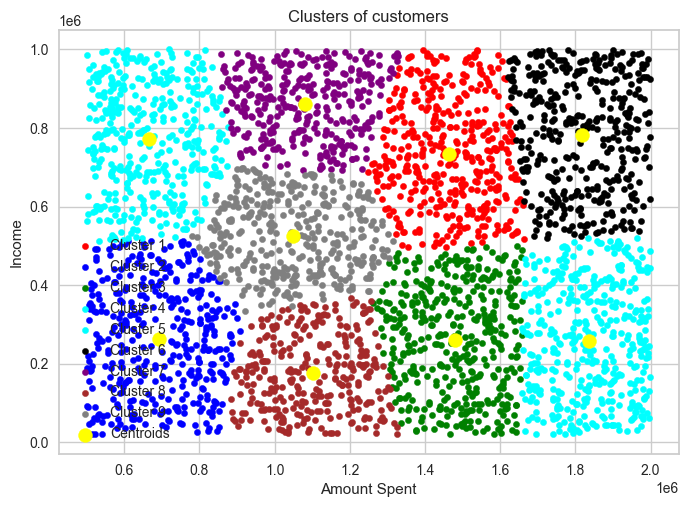

In [159]:
X = Kmeans_Segs[["Amount_Spent","Income"]]
X = X.values

kmeans = KMeans(n_clusters=9, init='k-means++') 
y_kmeans_2 = kmeans.fit_predict(X) 

plt.scatter(X[y_kmeans_2 == 0, 0], X[y_kmeans_2 == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_2 == 1, 0], X[y_kmeans_2 == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_2 == 2, 0], X[y_kmeans_2 == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans_2 == 3, 0], X[y_kmeans_2 == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans_2 == 4, 0], X[y_kmeans_2 == 4, 1], s = 20, c = 'cyan', label = 'Cluster 5')
plt.scatter(X[y_kmeans_2 == 5, 0], X[y_kmeans_2 == 5, 1], s = 20, c = 'black', label = 'Cluster 6')
plt.scatter(X[y_kmeans_2 == 6, 0], X[y_kmeans_2 == 6, 1], s = 20, c = 'purple', label = 'Cluster 7')
plt.scatter(X[y_kmeans_2 == 7, 0], X[y_kmeans_2 == 7, 1], s = 20, c = 'brown', label = 'Cluster 8')
plt.scatter(X[y_kmeans_2 == 8, 0], X[y_kmeans_2 == 8, 1], s = 20, c = 'gray', label = 'Cluster 9')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.ylabel('Income')
plt.xlabel('Amount Spent')
plt.legend()
plt.show()


## Using violin plot to visualize the clusters of the numerical variables

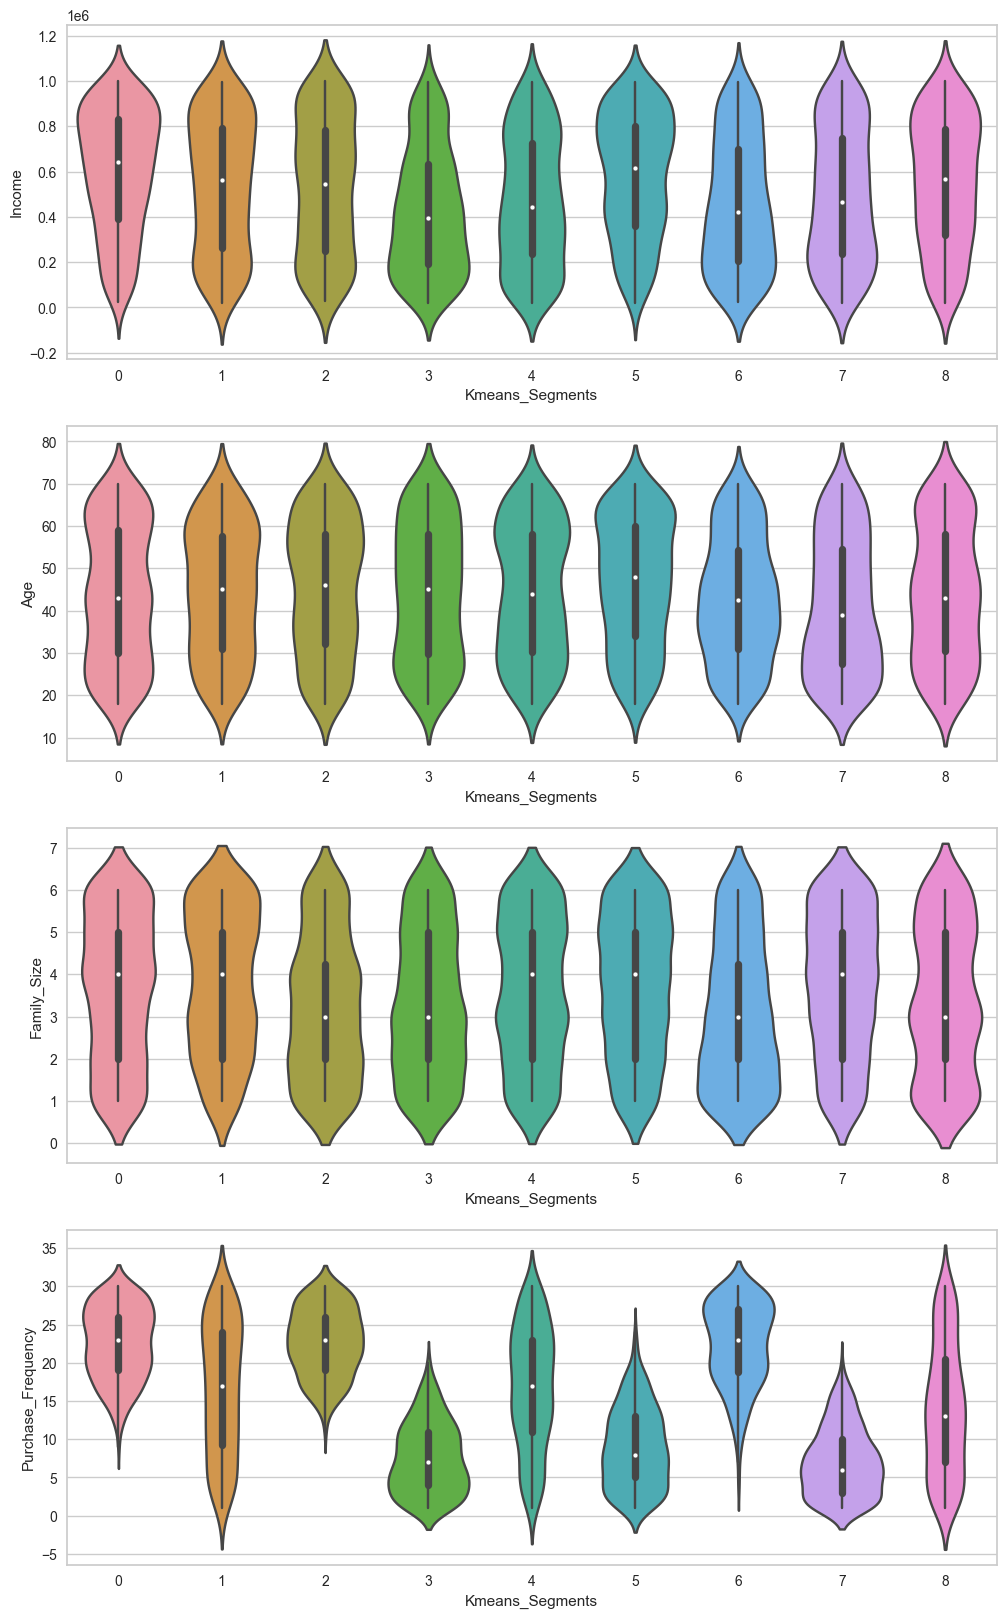

In [297]:
''' Violin Plots are instrumental in visualizing the characteristics of each cluster in relation to individual features or variables. 
They serve as a valuable tool for interpreting the behavior of each cluster, aiding in the decision-making process for tailored treatments
or promotions based on the unique characteristics exhibited by each cluster.'''



Kmeans_Segs_NV = Kmeans_Segments[['Income','Age','Family_Size','Purchase_Frequency',
             'Amount_Spent','Kmeans_Segments']]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 20))

for i in range(4):
    q1, q3 = np.quantile(Kmeans_Segs_NV.iloc[:, i], [0.25, 0.75])
    sns.violinplot(data=Kmeans_Segs_NV[['Kmeans_Segments', Kmeans_Segs_NV.columns[i]]].loc[
                       Kmeans_Segs_NV[Kmeans_Segs_NV.columns[i]] <= (q3 + 1.5 * (q3 - q1))],
                   x='Kmeans_Segments', y=Kmeans_Segs_NV.columns[i], ax=axs[i])

plt.show()

## Using bar chart to visualize the clusters of the categorical variables

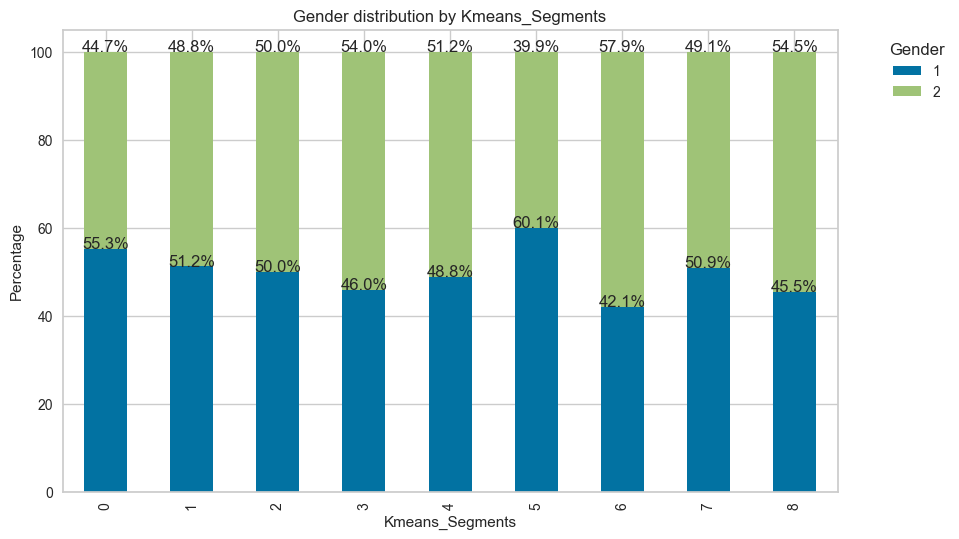

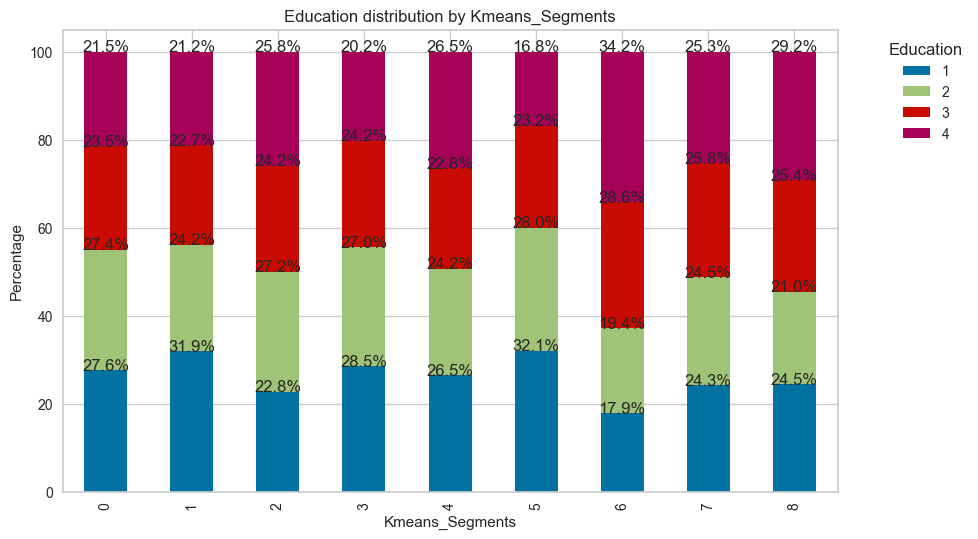

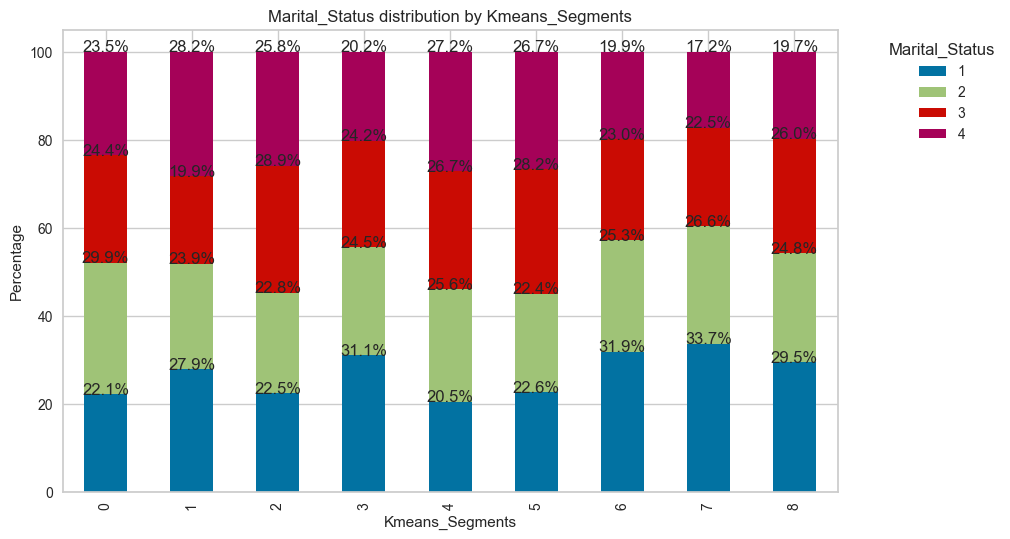

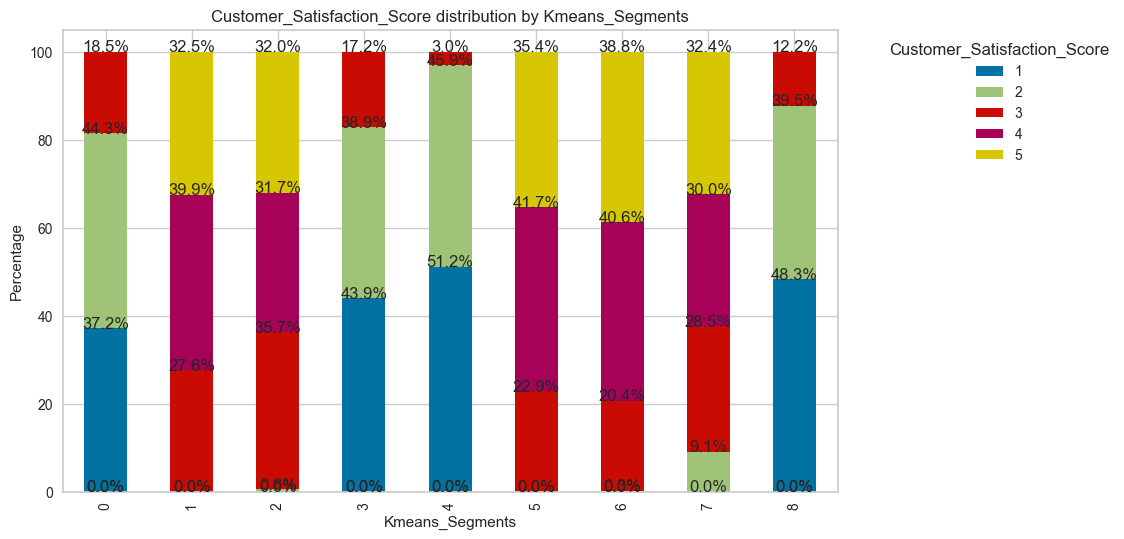

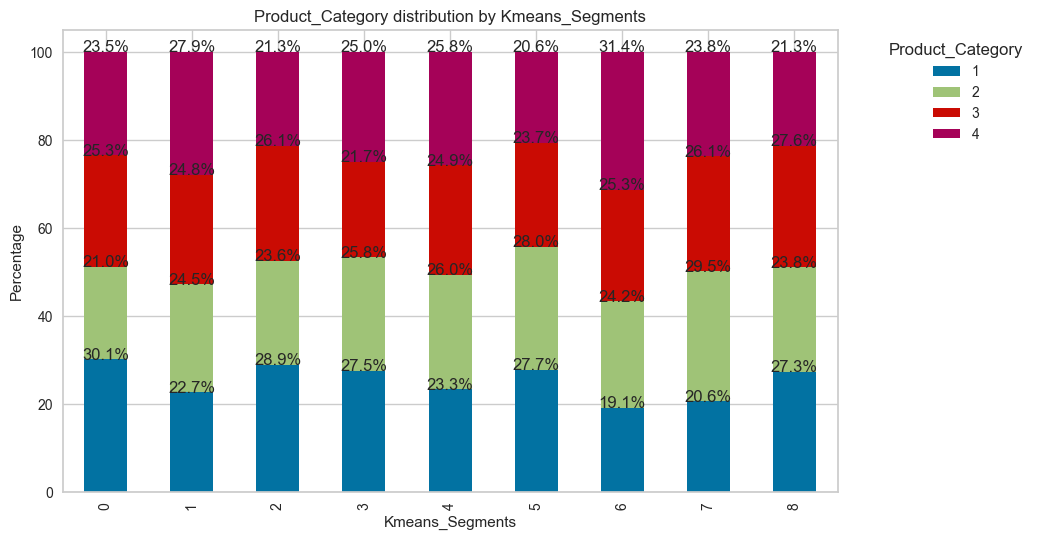

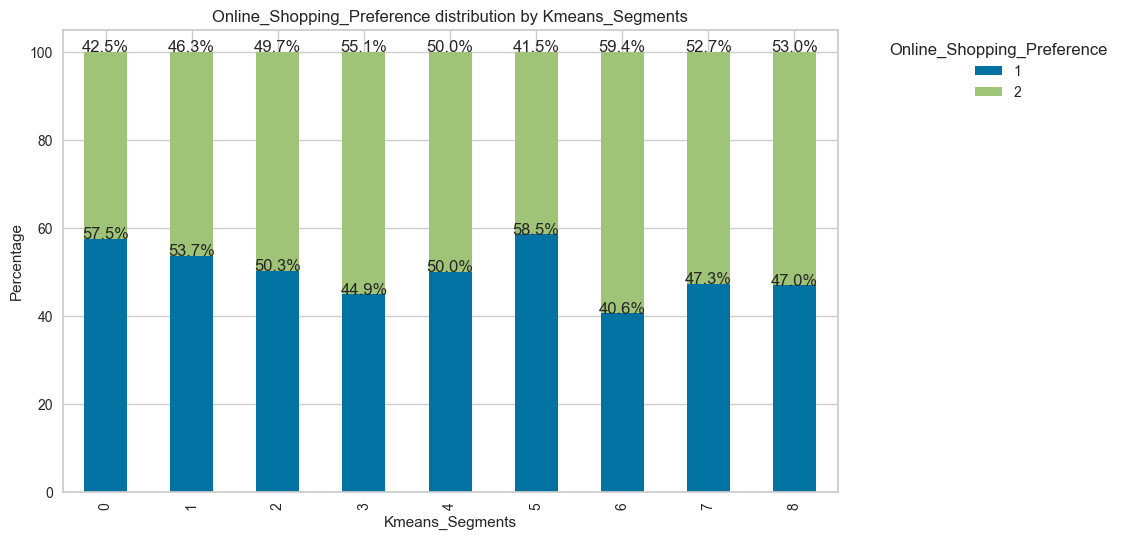

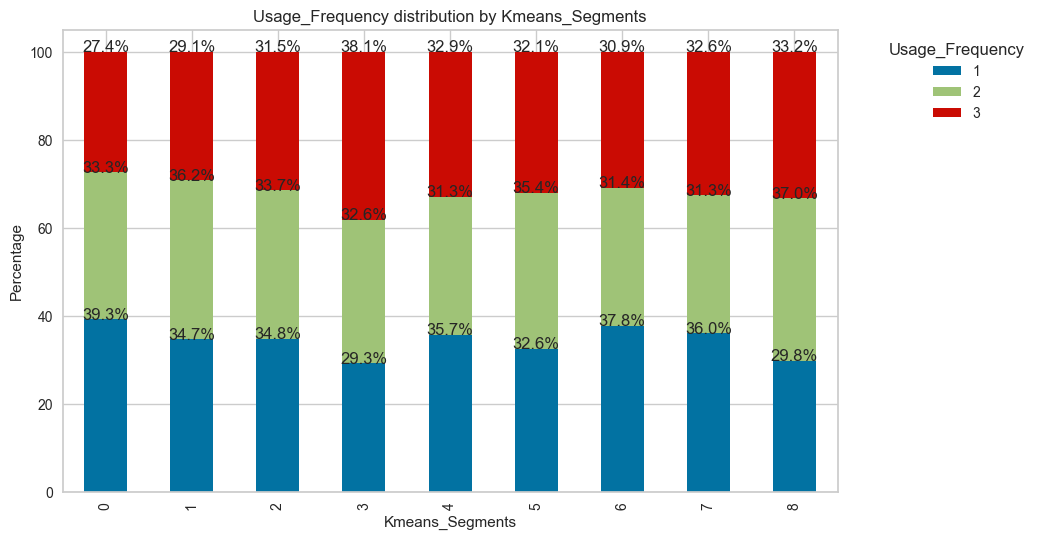

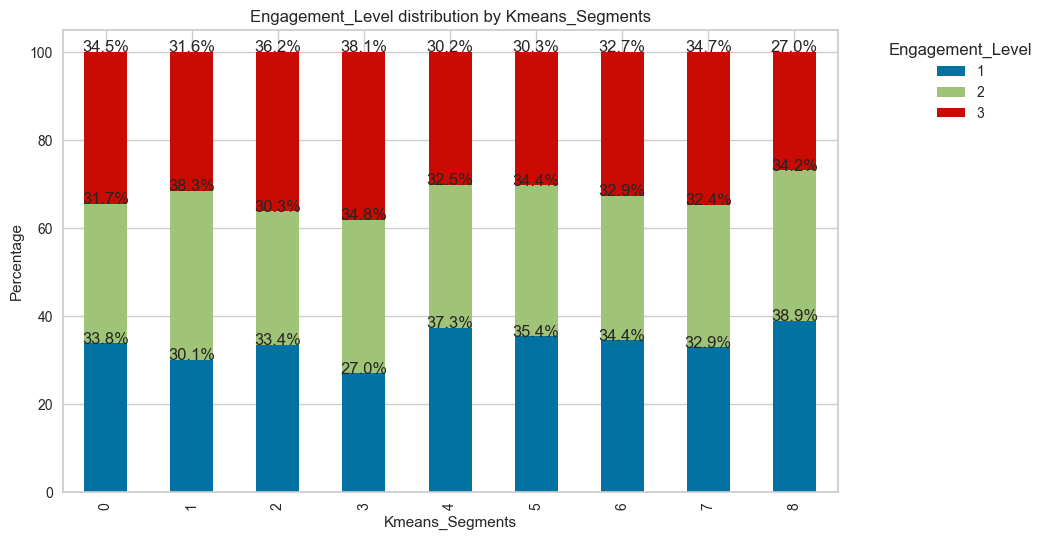

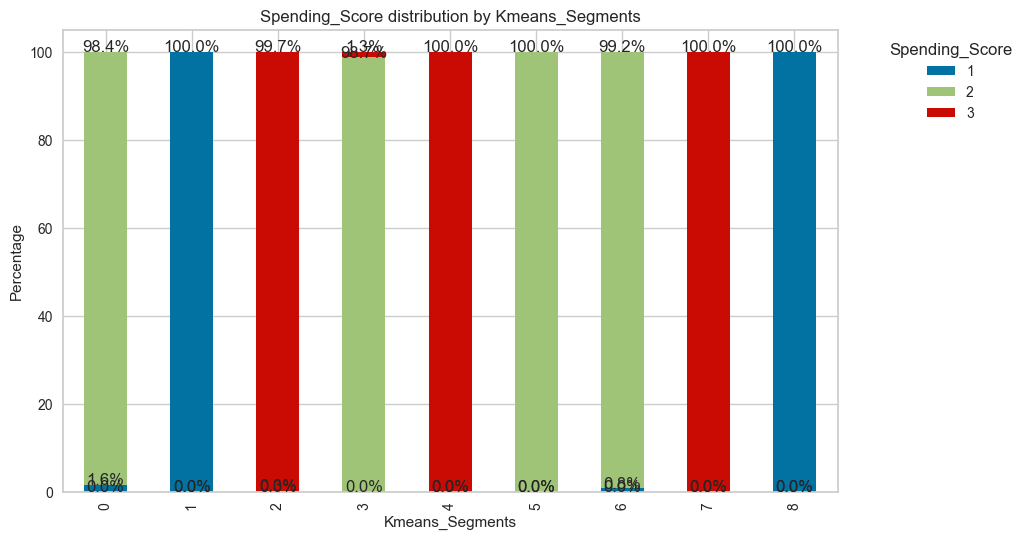

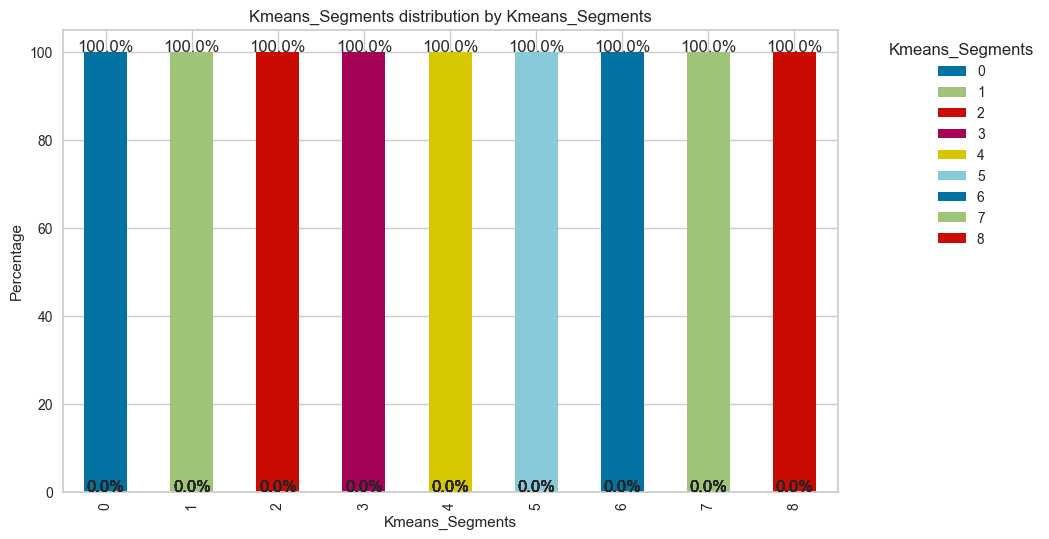

In [296]:

def plot_value_counts_percentage_by_segments(data, categorical_vars, segment_var='Kmeans_Segments'):
    for var in categorical_vars:
        grouped_data = data.groupby(segment_var)[var].value_counts(normalize=True).unstack() * 100
        ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
        
        plt.title(f"{var} distribution by {segment_var}")
        plt.xlabel(segment_var)
        plt.ylabel("Percentage")
        plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')

        # Adding percentage values on top of bars
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height:.1f}%', (x + width/2, y + height), ha='center')

        plt.show()

plot_value_counts_percentage_by_segments(Kmeans_Segs_CV, features, segment_var='Kmeans_Segments')


## Cluster Summary and Recommended Personalized Customer Experiences,Targeted Marketing Campaigns and Optimized Pricing Strategies

### Cluster 0
Customers in this cluster have an average income of more than N590,000, a family size of four, have made more than 22 purchases, and have spent more than N1.1 million.
The average age is 43 years old, the majority (55.3%) is male, more than half have a university (27.6%) and high school (27.4%) education, the majority (29.9%) is married, the majority (30.1%) prefer sparkling water, the majority (57.5%) prefer to shop offline, the majority (39.3%) makes weekly purchases, and the engagement level varies between high (33.8%), low (31.7%), and medium (34.5%).

* Personalized Customer Experiences:
Offer exclusive rewards or discounts for high-frequency offline shoppers to enhance their loyalty.
Provide personalized recommendations based on their preference for sparkling water.

* Targeted Marketing Campaigns:
Launch weekly promotions to attract more engagement from the majority making weekly purchases.
Advertise offline shopping benefits, catering to the 57.5% who prefer this channel.

* Optimized Pricing Strategies:
Implement loyalty programs with tiered benefits for high-spending customers, encouraging increased spending.
Consider dynamic pricing strategies for offline purchases to boost conversion rates.

### Cluster 1
Customers in this cluster earn an average of N536,854, have an average family size of four, make an average of 16 purchases, and spent an average of N651,887. 
The average age is 44 years old, the majority (55.3%) is male, the majority (31.9%) has a university education, the majority (27.9%) is widowed, the majority (27.9%) prefers fruit juice, the majority (39.3%) makes daily purchases, and the majority (38.3%) has a low engagement level. 

* Personalized Customer Experiences:
Tailor communication to suit the preferences of customers favoring fruit juice.
Provide targeted content or promotions for widowed customers, focusing on sensitivity.

* Targeted Marketing Campaigns:
Run daily promotions or flash sales to appeal to the majority making daily purchases.
Emphasize the convenience of online shopping to attract engagement from those with a low engagement level.

* Optimized Pricing Strategies:
Consider bundling strategies for daily purchasers to encourage higher basket sizes.
Implement discounts or promotions for online purchases to increase conversion.

### Cluster 2
Customers in this cluster earn an average of N530,608, have an average family size of three, make an average of 22 purchases and spent an average of N1.7 million. 
The average age is 45 years old, the male to female ratio is 1:1, the majority (27.2%) has a high school education, the majority (28.9%) is single, the majority (28.9%) prefer sparkling water, the majority (50.3%) prefer to shop offline, majority (34.8%) makes weekly purchases, and the majority (36.2%) has a medium engagement level. 

* Personalized Customer Experiences:
Provide a diverse range of offline shopping options for those who prefer this channel.
Offer personalized recommendations based on their preference for sparkling water.

* Targeted Marketing Campaigns:
Launch weekly promotions to attract more engagement from the majority making weekly purchases.
Emphasize the variety of products available for those with a medium engagement level.

* Optimized Pricing Strategies:
Implement dynamic pricing strategies for offline purchases to increase conversion rates.
Offer bundle deals for weekly purchasers to encourage higher spending.

### Cluster 3
In this cluster, customers exhibit distinctive characteristics, earning an average of approximately N428,266 with an average family size of three. They engage in an average of 7 purchases, spending around N1.1 million. The majority, constituting 54%, are female, and a significant portion (28.5%) holds a high school education. In terms of marital status, the prevalent group (31.1%) is widowed. Preferences within the cluster include a 27.5% preference for sparkling water, a substantial 55.1% preference for online shopping, and 38.1% making monthly purchases. Additionally, 38.1% fall into the category of a medium engagement level.

* Personalized Customer Experiences:
Implement personalized online shopping recommendations based on the majority's preference for online shopping.
Offer exclusive promotions or discounts for medium-engagement level customers, encouraging more frequent purchases.

* Targeted Marketing Campaigns:
Advertise monthly deals to attract the 38.1% making monthly purchases.
Create content emphasizing the ease and convenience of online shopping for the majority who prefer this channel.

* Optimized Pricing Strategies:
Introduce loyalty programs with monthly benefits to incentivize consistent purchasing.
Consider personalized discounts for products like sparkling water to increase customer retention.

### Cluster 4
Customers in this cluster earn an average of N472,443 have an average family size of four, make an average of 16 purchases and spent an average of N1.7 million. 
The average age is 44 years old, the majority (51.2%) is female, more than half have a university (26.5%) and high school (26.5%) education, the majority (27.2%) is divorced, the majority (26%) prefer energy drink,  majority (38.1%) makes weekly purchases, and the majority (37.3%) has a high engagement level. 

* Personalized Customer Experiences:
Develop marketing materials highlighting the benefits of high-engagement level customers, aiming to retain this group.
Offer personalized promotions or rewards for weekly purchasers to encourage continued loyalty.

* Targeted Marketing Campaigns:
Run campaigns focusing on the energy drink preferences of this cluster.
Advertise weekly promotions to attract and engage the 38.1% making weekly purchases.

* Optimized Pricing Strategies:
Consider bundling strategies for weekly purchasers to increase basket sizes.
Implement exclusive discounts or rewards for high-engagement level customers.


### Cluster 5
Customers in this cluster earn an average of N577,172, have an average family size of four, make an average of 9 purchases and spent an average of N1 million. 
The average age is 46 years old, the majority (60.1%) is male,  majority (32.1%) has a university education, the majority (28.2%) is single, the majority (28.2%) prefer energy drink, the majority (58.5%) prefer to shop offline,  majority (32.6%) makes weekly purchases, and the majority (35.4%) has a high engagement level. 

* Personalized Customer Experiences:
Tailor online shopping experiences to align with the preferences of the majority who prefer this channel.
Provide personalized recommendations based on the energy drink preferences within the cluster.

* Targeted Marketing Campaigns:
Run offline shopping promotions to attract engagement from the 58.5% who prefer this channel.
Advertise weekly promotions to engage the 32.6% making weekly purchases.

* Optimized Pricing Strategies:
Consider dynamic pricing for offline shopping to increase conversion rates.
Implement weekly promotions to capitalize on the majority making weekly purchases.

### Cluster 6
Customers in this cluster earn an average of N456,830, have an average family size of four, make an average of 22 purchases and spent an average of N1.1 million. 
The average age is 43 years old, the majority (57.9%) is female,  majority (34.2%) has a PhD education, the majority (31.9%) is widowed, the majority (31.4%) prefer fruit juice, the majority (59.4%) prefer to shop Online, majority (37.8%) makes weekly purchases, and the majority (34.4%) has a medium engagement level. 

* Personalized Customer Experiences:
Enhance online shopping experiences to cater to the majority who prefer this channel.
Provide personalized recommendations based on the fruit juice preferences within the cluster.

* Targeted Marketing Campaigns:
Advertise online shopping benefits to attract and engage the 59.4% who prefer this channel.
Run promotions highlighting the fruit juice preferences of this cluster.

* Optimized Pricing Strategies:
Consider personalized discounts for fruit juice products to increase customer retention.
Implement exclusive online shopping deals to boost conversion.


### Cluster 7
Customers in this cluster earn an average of N490,814 have an average family size of four, make an average of 7 purchases and spent an average of N1.7 million. 
The average age is 41 years old, the majority (50.9%) is male,  more than half have a post university degree (25.8%) and PhD (25.3%) education, the majority (33.7%) is widowed, the majority (29.5%) prefer energy drink, the majority (52.7%) prefer to shop Online, majority (36%) makes weekly purchases, and the majority (34.7%) has a medium engagement level. 

* Personalized Customer Experiences:
Tailor online shopping experiences to align with the preferences of the majority who prefer this channel.
Provide personalized recommendations based on the energy drink preferences within the cluster.

* Targeted Marketing Campaigns:
Run weekly promotions to engage the 36% making weekly purchases.
Advertise online shopping benefits to attract the 52.7% who prefer this channel.

* Optimized Pricing Strategies:
Implement dynamic pricing for online shopping to increase conversion rates.
Offer exclusive discounts for high-engagement level customers.



### Cluster 8
Customers in this cluster earn an average of N546,481 have an average family size of three, make an average of 14 purchases and spent an average of N637,845
The average age is 43 years old, the majority (54.5%) is female,  the majority (29.2%) has a PhD  education, the majority (29.5%) is widowed, the majority (27.6%) prefer soda, the majority (53%) prefer to shop Online, majority (37%) makes daily purchases, and the majority (38.9%) has a medium engagement level. 

* Personalized Customer Experiences:
Enhance online shopping experiences to cater to the majority who prefer this channel.
Provide personalized recommendations based on the soda preferences within the cluster.

* Targeted Marketing Campaigns:
Advertise daily promotions to engage the 37% making daily purchases.
Run promotions highlighting the soda preferences of this cluster.

* Optimized Pricing Strategies:
Consider personalized discounts for soda products to increase customer retention.
Implement exclusive online shopping deals to boost conversion.






## Evaluating the K-means Clusters and Recommending Personalized Customer Experience communications, Targeted Marketing Campaigns and Optimized Pricing Strategies

Identify the preferences, needs, capacity, concerns and spending appetite for each cluster using:
— What are their preferences (Preferred_Products, Lifestyle_Preferences, Online_Shopping_Preference) and needs (gender, Family_Size, Region) of the individual segments
— What are their interests (Hobbies_Interests,Social_Media_Behavior,Age, Education) and concerns (Values_Beliefs)
— What is their capacity (Income, Family_Size,Education) and spending appetite (Spending_Score, Amount_Spent)


Age, Gender, Income, Education, Occupation, Marital_Status, Family_Size, Region, Purchase_Frequency, Amount_Spent, Preferred_Products, Brand_Loyalty, Lifestyle_Preferences, Hobbies_Interests, Values_Beliefs, Social_Media_Behavior, Customer_Satisfaction_Score, Product_Category, Online_Shopping_Preference, Usage_Frequency, Zip_Code, Spending_Score, Customer_id, Purchase_date   


Personalized Customer Experiences:
Customer segmentation enables businesses to create personalized experiences for different groups. By understanding the unique preferences and needs of each segment, companies can tailor their products, services, and communication to resonate with customers on a more personal level. This fosters stronger connections and brand loyalty.

Utilize customer demographic information (age, gender, education) to create personalized marketing campaigns that resonate with the varied characteristics of the cluster. Tailor marketing messages to highlight products or promotions that align with the diverse preferences and needs of different customer segments within the cluster.
— What are their preferences (Preferred_Products, Lifestyle_Preferences, Online_Shopping_Preference) and needs (gender, Family_Size,Education, Region) of the individual segments

Targeted Marketing Campaigns:
With customer segmentation, marketing efforts can be laser-focused. Instead of deploying broad campaigns that may only resonate with a fraction of the audience, businesses can craft targeted messages that speak directly to the interests and concerns of specific customer segments. This not only improves the effectiveness of marketing campaigns but also optimizes marketing budgets.
— What are their interests (Hobbies_Interests,Social_Media_Behavior,Age, Education, Purchase_Frequency) and concerns (Values_Beliefs)

Optimized Pricing Strategies:
Different customer segments may have varying price sensitivities. Customer segmentation allows businesses to implement pricing strategies that are optimized for each segment. This ensures that prices align with perceived value, maximizing revenue and profit margins.
— What is their capacity (Income, Family_Size,Education) and spending appetite (Spending_Score, Amount_Spent)


Based on the characteristics of the wholesale customers cluster, several sales strategies can be considered to effectively target and serve this customer segment:

- Personalized Marketing Campaigns:
Utilize customer demographic information (age, gender, education) to create personalized marketing campaigns that resonate with the varied characteristics of the cluster.
Tailor marketing messages to highlight products or promotions that align with the diverse preferences and needs of different customer segments within the cluster.

- Online Engagement Enhancement:
Leverage the moderate preference for online shopping by enhancing the online shopping experience. This can include improving website usability, implementing targeted online promotions, and providing seamless online transaction processes.

- Product Bundling and Recommendations:
Analyze the product categories preferred by the cluster and create bundled offerings or promotions that align with their preferences.
Implement recommendation engines or personalized product suggestions to encourage additional purchases based on the observed purchasing behavior.

- Customer Loyalty Programs:
Introduce loyalty programs to reward frequent purchasers within the cluster. Offer exclusive discounts, early access to new products, or special promotions to incentivize continued loyalty.

- Segmented Communication Strategies:
Develop segmented communication strategies based on customer engagement levels. High-engagement customers may respond well to exclusive previews or events, while less-engaged customers could benefit from targeted re-engagement campaigns.

- Price Optimization:
Consider implementing dynamic pricing strategies based on customer spending scores. Offer targeted discounts or incentives to customers with lower spending scores to encourage increased spending.

- Education and Support Initiatives:
Recognizing the moderate education level, consider implementing educational initiatives. Provide informative content about products, usage tips, and benefits to enhance the customer's understanding and satisfaction.

- Responsive Customer Support:
Given the diverse range of customers, ensure responsive and personalized customer support services. Address customer inquiries and concerns promptly to enhance overall satisfaction.

- Social Media Engagement:
Leverage social media platforms to engage with customers. Share content that aligns with the diverse interests and preferences of the cluster, encouraging interaction and brand loyalty.

- Data-Driven Insights:
Continuously analyze customer data to identify evolving trends and preferences within the cluster. Use these insights to adapt sales and marketing strategies in real-time.

Remember, the effectiveness of these strategies can be further enhanced by continuous monitoring and adaptation based on customer feedback and market dynamics. Regularly reassessing the success of these initiatives will enable a more agile and customer-centric approach.